In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options for better viewing
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

# Load the dataset
file_path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.shape)
df.head()

(1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/46-stocks-moving-in-fridays-mid-day-session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",https://www.benzinga.com/news/20/05/16095304/b-of-a-securities-maintains-neutral-on-agilent-technologies-raises-price-target-to-88,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [2]:
# Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [3]:
# Drop the redundant 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert the 'date' column to datetime objects. 
# The format includes timezone, and pandas handles this automatically.
df['date'] = pd.to_datetime(df['date'], utc=True)

# Check for and remove duplicate rows based on headline, date, and stock
print(f"Number of rows before dropping duplicates: {len(df)}")
df.drop_duplicates(subset=['headline', 'date', 'stock'], inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")



print("\nData types after conversion:")
print(df.info())
print("\nFirst 5 rows with cleaned data:")
df.head()

Number of rows before dropping duplicates: 1407328
Number of rows after dropping duplicates: 1395973

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395973 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   headline   1395973 non-null  object             
 1   url        1395973 non-null  object             
 2   publisher  1395973 non-null  object             
 3   date       1395973 non-null  datetime64[ns, UTC]
 4   stock      1395973 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 63.9+ MB
None

First 5 rows with cleaned data:


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/46-stocks-moving-in-fridays-mid-day-session,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",https://www.benzinga.com/news/20/05/16095304/b-of-a-securities-maintains-neutral-on-agilent-technologies-raises-price-target-to-88,Vick Meyer,2020-05-22 15:38:59+00:00,A


Descriptive Statistics for Headline Length:
count    1.395973e+06
mean     7.326274e+01
std      4.081928e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


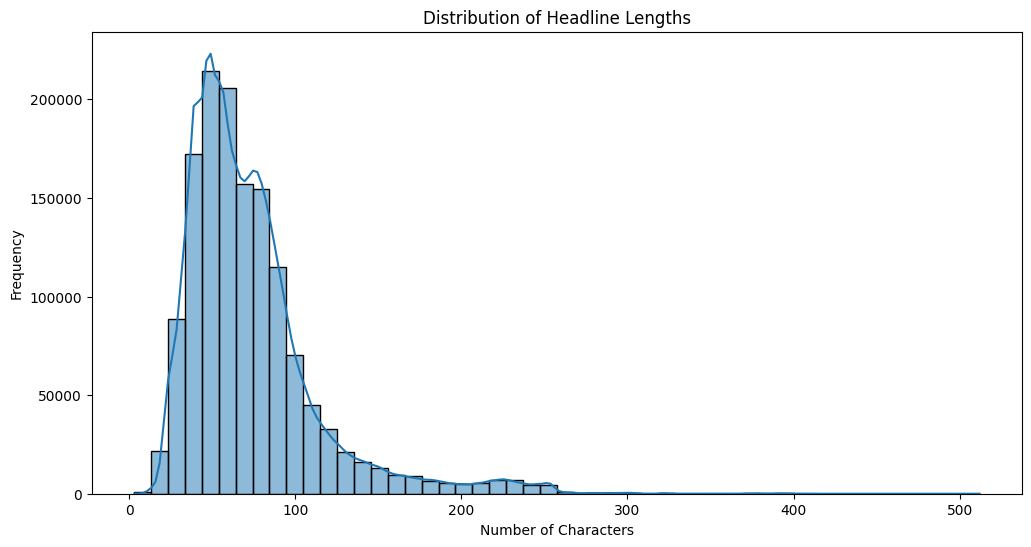

In [4]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].str.len()

# Display descriptive statistics for headline length
print("Descriptive Statistics for Headline Length:")
print(df['headline_length'].describe())

# Visualize the distribution of headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

Top 20 Most Active Publishers:
Paul Quintaro        227495
Lisa Levin           186716
Benzinga Newsdesk    150392
Charles Gross         96558
Monica Gerson         82056
Eddie Staley          56896
Hal Lindon            48958
ETF Professor         28251
Juan Lopez            28110
Benzinga Staff        27526
Vick Meyer            24826
Benzinga_Newsdesk     19409
Jayson Derrick        19050
Zacks                 18852
Allie Wickman         18073
Shanthi Rexaline      16640
Craig Jones           16206
webmaster             14911
Wayne Duggan          12897
Nelson Hem            12576
Name: publisher, dtype: int64


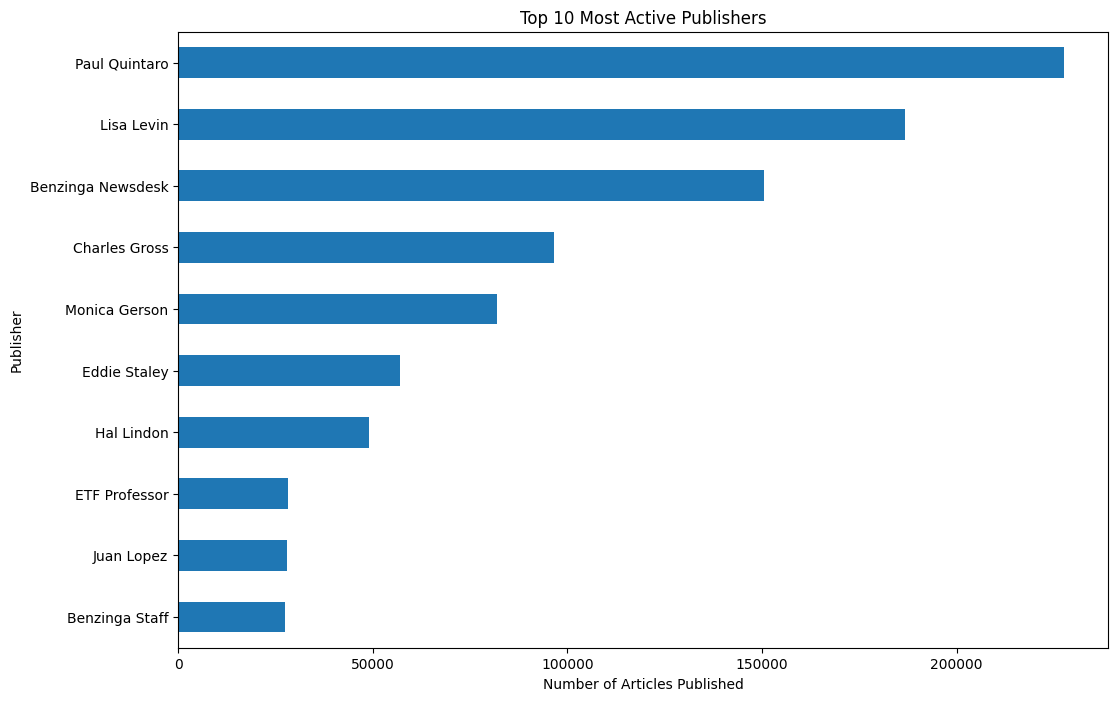

In [5]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("Top 20 Most Active Publishers:")
print(publisher_counts.head(20))

# Visualize the top 10 publishers
plt.figure(figsize=(12, 8))
publisher_counts.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles Published')
plt.ylabel('Publisher')
plt.show()

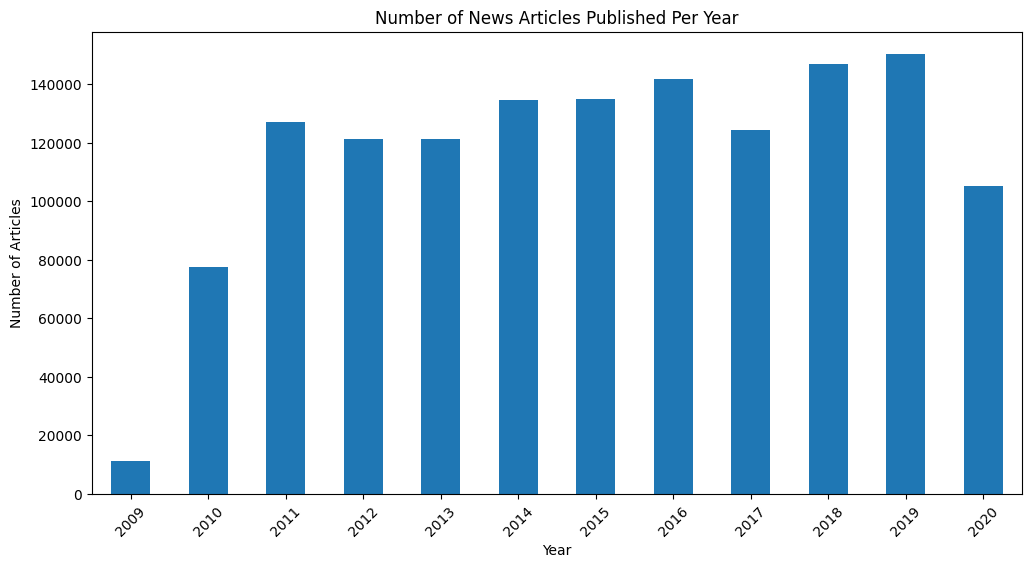

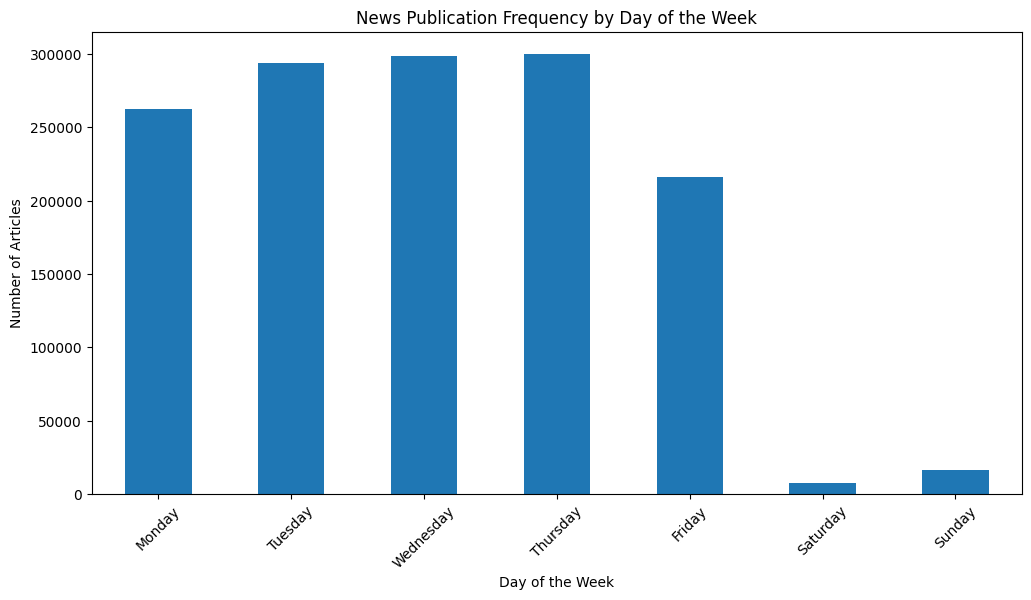

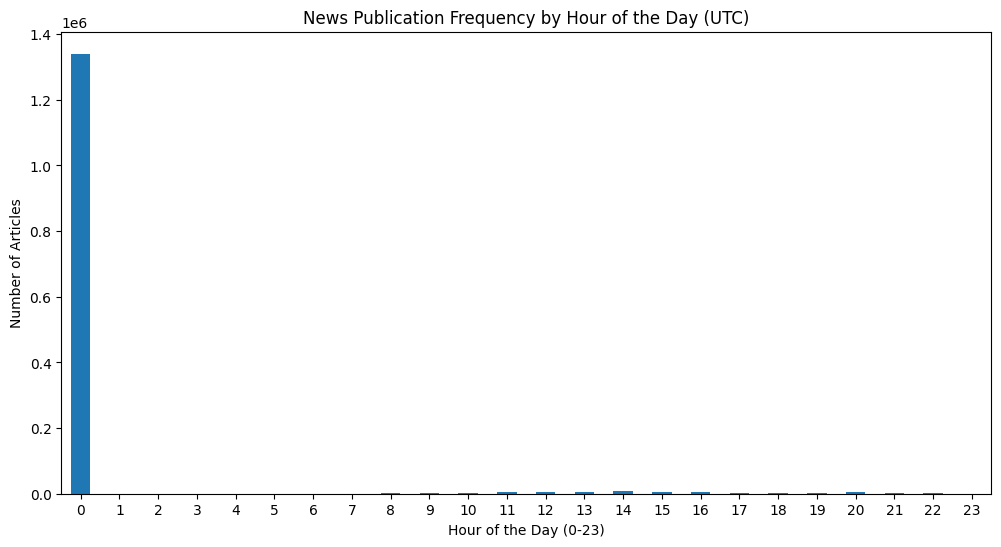

In [6]:
# Set the date as the index of the DataFrame to facilitate time series analysis
df.set_index('date', inplace=True)
df.sort_index(inplace=True) # Sort by date

# Analyze publication frequency over years
plt.figure(figsize=(12, 6))
df.index.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of News Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Analyze publication frequency by day of the week
plt.figure(figsize=(12, 6))
df.index.day_name().value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('News Publication Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Analyze publication frequency by hour of the day (in UTC)
plt.figure(figsize=(12, 6))
df.index.hour.value_counts().sort_index().plot(kind='bar')
plt.title('News Publication Frequency by Hour of the Day (UTC)')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

df_sample = df.sample(n=50000, random_state=42)

# Most common single words (unigrams)
# stop_words='english' removes common words like 'the', 'a', 'in'
vec_unigram = CountVectorizer(stop_words='english', ngram_range=(1, 1)).fit(df_sample['headline'])
bag_of_words = vec_unigram.transform(df_sample['headline'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec_unigram.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Top 20 most common keywords:")
print(words_freq[:20])

print("\n" + "="*50 + "\n")

# Most common two-word phrases (bigrams)
vec_bigram = CountVectorizer(stop_words='english', ngram_range=(2, 2)).fit(df_sample['headline'])
bag_of_words = vec_bigram.transform(df_sample['headline'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec_bigram.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Top 20 most common phrases (bigrams):")
print(words_freq[:20])

Top 20 most common keywords:
[('stocks', 5845), ('vs', 5759), ('est', 5018), ('eps', 4685), ('market', 4282), ('shares', 4103), ('reports', 3933), ('update', 3330), ('earnings', 3129), ('sales', 2957), ('benzinga', 2661), ('pt', 2614), ('week', 2594), ('announces', 2354), ('price', 2351), ('mid', 2253), ('buy', 2243), ('downgrades', 2206), ('52', 2114), ('raises', 2105)]


Top 20 most common phrases (bigrams):
[('52 week', 1912), ('price target', 1716), ('stocks moving', 1475), ('mid day', 1377), ('earnings scheduled', 1214), ('market update', 1206), ('pre market', 1012), ('raises pt', 984), ('initiates coverage', 971), ('companies trading', 827), ('market session', 810), ('vs est', 802), ('q1 eps', 771), ('trading higher', 771), ('adj eps', 770), ('stocks hit', 744), ('hit 52', 742), ('q4 eps', 739), ('new 52', 732), ('benzinga upgrades', 730)]
